<a href="https://colab.research.google.com/github/404himel/ML/blob/main/strokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data prep


In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


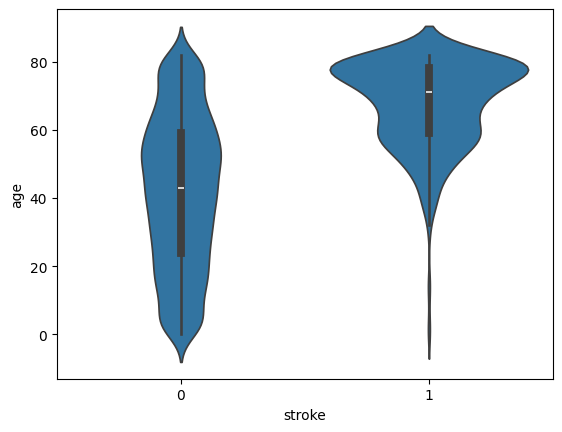

In [ ]:
sns.violinplot(data=df,x='stroke',y='age')
plt.savefig('violin_age.png',dpi=300)

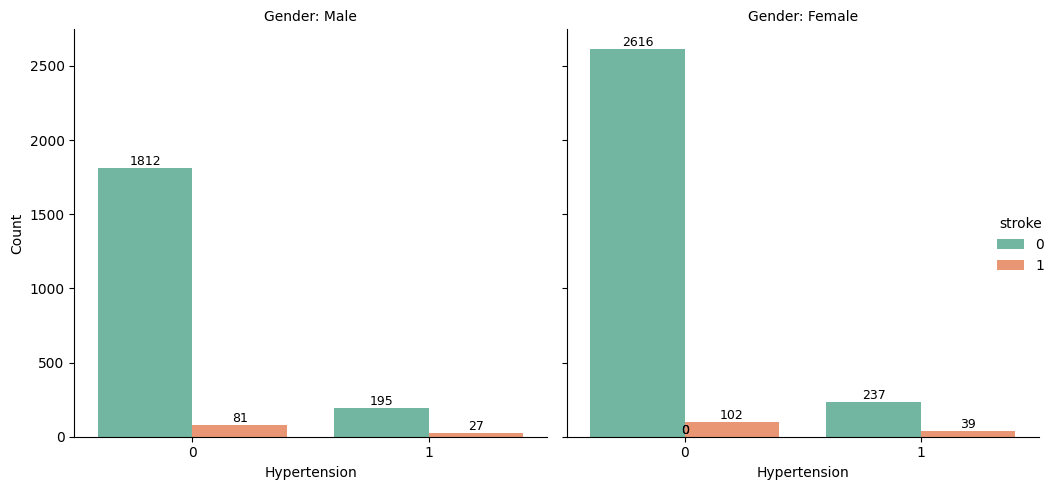

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet the countplot by gender
g = sns.catplot(data=df, x='hypertension', hue='stroke', col='gender', kind='count', palette='Set2')

# Add count labels to each bar in every facet
for ax in g.axes.flat:
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)

# Add titles and labels
g.set_axis_labels("Hypertension", "Count")
g.set_titles("Gender: {col_name}")
plt.tight_layout()
plt.savefig('hypertension_stroke.png',dpi=300)
plt.show()


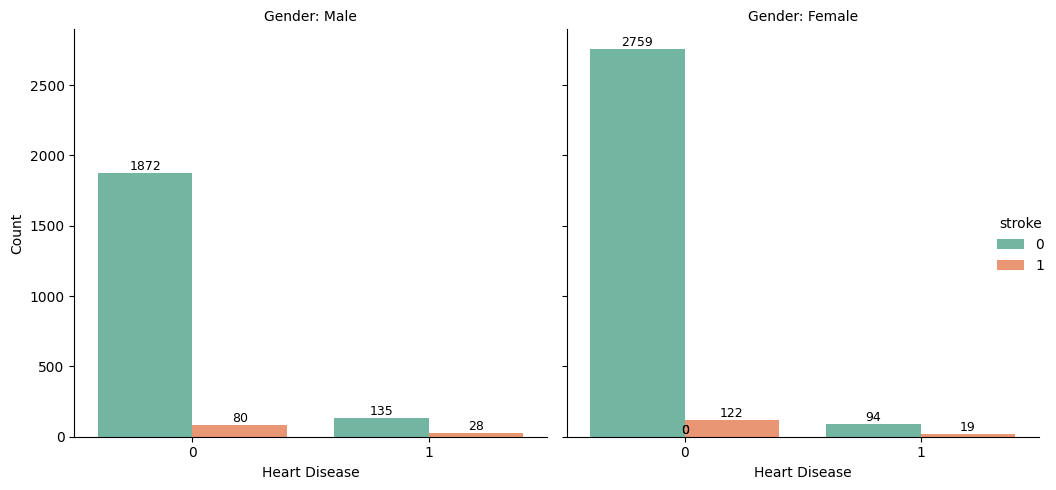

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet the countplot by gender
g = sns.catplot(data=df, x='heart_disease', hue='stroke', col='gender', kind='count', palette='Set2')

# Add count labels to each bar in every facet
for ax in g.axes.flat:
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)

# Add titles and labels
g.set_axis_labels("Heart Disease", "Count")
g.set_titles("Gender: {col_name}")
plt.tight_layout()
plt.savefig('heart_stroke.png',dpi=300)
plt.show()


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

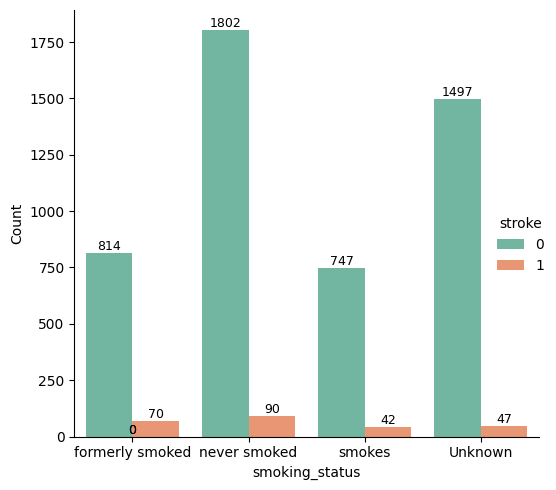

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet the countplot by gender
g = sns.catplot(data=df, x='smoking_status', hue='stroke',  kind='count', palette='Set2')

# Add count labels to each bar in every facet
for ax in g.axes.flat:
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)

# Add titles and labels
g.set_axis_labels("smoking_status", "Count")
g.set_titles("Gender: {col_name}")
plt.tight_layout()
plt.savefig('smoking_status.png',dpi=300)
plt.show()


In [ ]:
df['heart_disease'].unique()

array([1, 0])

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

In [ ]:
df.drop(['id'],inplace=True,axis=1)

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [ ]:
df['bmi'].mean()

np.float64(28.894559902200488)

In [ ]:
df.fillna(df['bmi'].mean(),inplace=True)

In [ ]:
age_group=[]
for i in df['age']:
    if i<2.0:
        age_group.append('Toddler')
    elif i>2.0 and i<=19.0:
        age_group.append('Teen')
    elif i>19.0 and i<60.0:
        age_group.append('Adult')
    else:
        age_group.append('Senior')
df['age_group']=age_group
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [ ]:
def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    gender = cols[2]
    if pd.isnull(bmi):
        if age_group == 'Senior':
            if gender == 'Male':
                return 29.0
            else:
                return 28.9
        elif age_group == 'Adult':
            if gender == 'Male':
                return 30.2
            else:
                return 28.8
        elif age_group == 'Teen':
            if gender == 'Male':
                return 20.6
            else:
                return 21.8
        else:
            if gender == 'Male':
                return 18.9
            else:
                return 18.05
    else:
        return bmi
df['bmi']=df[['bmi','age_group','gender']].apply(impute_bmi,axis=1)
df.head()

<ipython-input-84-679190f66f3d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bmi = cols[0]
<ipython-input-84-679190f66f3d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_group = cols[1]
<ipython-input-84-679190f66f3d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gender = cols[2]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Senior
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5105,False
5106,False
5107,False
5108,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


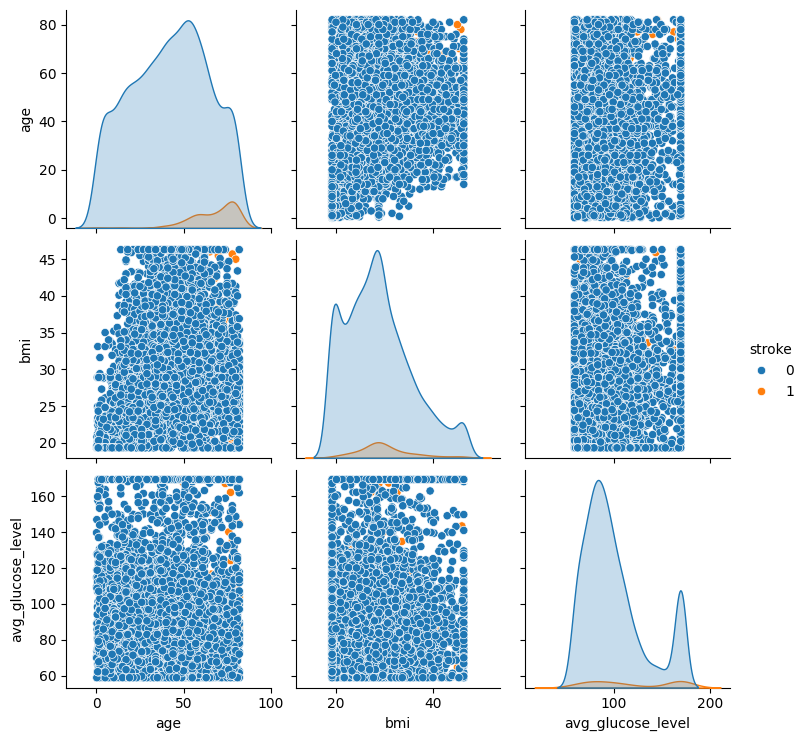

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the desired columns + the hue column
selected_columns = ['age', 'bmi', 'avg_glucose_level', 'stroke']
df_selected = df[selected_columns]

# Create pairplot with hue = 'stroke'
sns.pairplot(data=df_selected, hue='stroke')

# Save the figure
plt.savefig('pairplot.png', dpi=300)
plt.show()


In [ ]:
df.drop('age_group',axis=1,inplace=True)

In [ ]:
col = df.select_dtypes(include=['float64','int64']).columns
col


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

## fig of outlier

In [ ]:
col = ['avg_glucose_level','bmi']

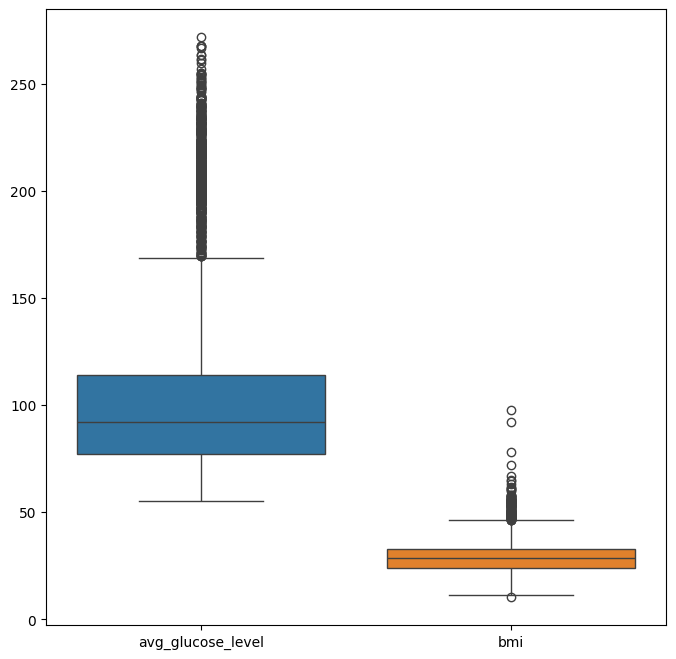

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df[col])
plt.savefig('outlier_before.png',dpi=300)

In [ ]:
per_25 = df['avg_glucose_level'].quantile(.25)
per_75 = df['avg_glucose_level'].quantile(.75)
iqr = per_75 - per_25
upper_limit = per_75 + 1.5*iqr
lower_limit = per_75 - 1.5*iqr
print(upper_limit)
print(lower_limit)

169.365
58.81499999999999


In [ ]:
df['avg_glucose_level'] = np.where(
    df['avg_glucose_level'] > upper_limit,
    upper_limit,
    np.where(
        df['avg_glucose_level'] < lower_limit,
        lower_limit,
        df['avg_glucose_level']
    )
)


<Axes: ylabel='avg_glucose_level'>

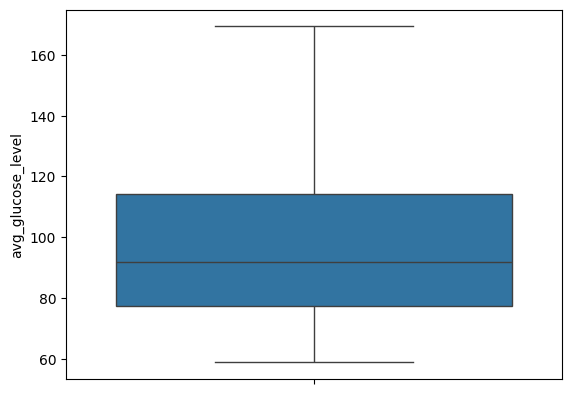

In [ ]:
sns.boxplot(data=df['avg_glucose_level'])

In [ ]:
per_25 = df['bmi'].quantile(.25)
per_75 = df['bmi'].quantile(.75)
iqr = per_75 - per_25
upper_limit = per_75 + 1.5*iqr
lower_limit = per_75 - 1.5*iqr
print(upper_limit)
print(lower_limit)

df['bmi'] = np.where(
    df['bmi'] > upper_limit,
    upper_limit,
    np.where(
        df['bmi'] < lower_limit,
        lower_limit,
        df['bmi']
    )
)


46.29999999999999
19.300000000000004


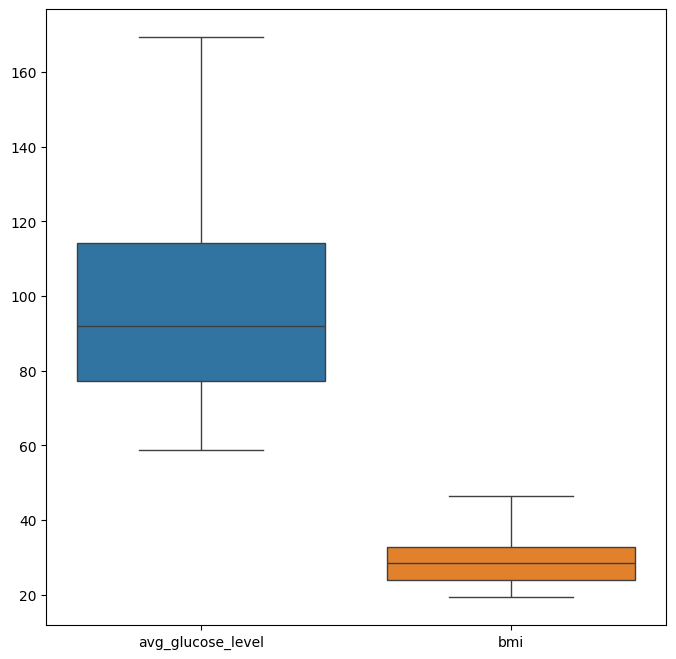

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df[col])
plt.savefig('outlier_after.png',dpi=300)

In [ ]:
cor = df[col].corr()
cor['stroke'].sort_values(ascending=False)

,stroke
stroke,1.000000
age,0.245239
heart_disease,0.134905
hypertension,0.127891
avg_glucose_level,0.115749
bmi,0.041893


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


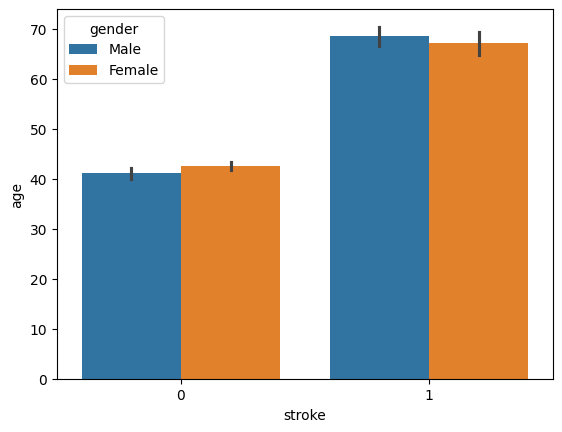

In [ ]:
sns.barplot(data=df,x='stroke',y='age',hue='gender')
plt.savefig('age_stroke.png',dpi=300)

In [ ]:
df_enc=pd.get_dummies(df[df.select_dtypes(include='object').columns],drop_first=True)
df_enc.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,True,False,True,False,True,False,False,True,True,False,False
1,False,False,True,False,False,True,False,False,False,True,False
2,True,False,True,False,True,False,False,False,False,True,False
3,False,False,True,False,True,False,False,True,False,False,True
4,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
df[df.select_dtypes(include='object').columns]

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
# Get the encoded features
df_enc = pd.get_dummies(df[df.select_dtypes(include='object').columns], drop_first=True)


df = pd.concat([df, df_enc], axis=1)

df = df.drop(columns=df.select_dtypes(include='object').columns)

df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,169.365,36.60000,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,169.365,28.89456,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.920,32.50000,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,169.365,34.40000,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,169.365,24.00000,1,False,True,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def label_converter():
  for i in df.select_dtypes(include='object').columns:
    df[i] = le.fit_transform(df[i])
  return df


In [ ]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
label_converter()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.365,36.60000,1,1
1,0,61.0,0,0,1,3,0,169.365,28.89456,2,1
2,1,80.0,0,1,1,2,0,105.920,32.50000,2,1
3,0,49.0,0,0,1,2,1,169.365,34.40000,3,1
4,0,79.0,1,0,1,3,0,169.365,24.00000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.750,28.89456,2,0
5106,0,81.0,0,0,1,3,1,125.200,40.00000,2,0
5107,0,35.0,0,0,1,3,0,82.990,30.60000,2,0
5108,1,51.0,0,0,1,2,0,166.290,25.60000,1,0


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.365,36.60000,1,1
1,0,61.0,0,0,1,3,0,169.365,28.89456,2,1
2,1,80.0,0,1,1,2,0,105.920,32.50000,2,1
3,0,49.0,0,0,1,2,1,169.365,34.40000,3,1
4,0,79.0,1,0,1,3,0,169.365,24.00000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.750,28.89456,2,0
5106,0,81.0,0,0,1,3,1,125.200,40.00000,2,0
5107,0,35.0,0,0,1,3,0,82.990,30.60000,2,0
5108,1,51.0,0,0,1,2,0,166.290,25.60000,1,0


In [ ]:
len(df.columns)

16

In [ ]:
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [ ]:
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [ ]:
df['ever_married'].unique()

array([1, 0])

In [ ]:
df['ever_married'].unique()

array([1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   stroke                          5109 non-null   int64  
 6   gender_Male                     5109 non-null   bool   
 7   ever_married_Yes                5109 non-null   bool   
 8   work_type_Never_worked          5109 non-null   bool   
 9   work_type_Private               5109 non-null   bool   
 10  work_type_Self-employed         5109 non-null   bool   
 11  work_type_children              5109 non-null   bool   
 12  Residence_type_Urban            5109 no

In [ ]:
for i in df.select_dtypes(include='float64').columns:
  df[i]  = df[i].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             5109 non-null   int64
 1   age                5109 non-null   int64
 2   hypertension       5109 non-null   int64
 3   heart_disease      5109 non-null   int64
 4   ever_married       5109 non-null   int64
 5   work_type          5109 non-null   int64
 6   Residence_type     5109 non-null   int64
 7   avg_glucose_level  5109 non-null   int64
 8   bmi                5109 non-null   int64
 9   smoking_status     5109 non-null   int64
 10  stroke             5109 non-null   int64
dtypes: int64(11)
memory usage: 479.0 KB


In [ ]:
cor = df.corr()
cor['stroke'].sort_values(ascending=False)

,stroke
stroke,1.000000
age,0.245109
heart_disease,0.134905
hypertension,0.127891
avg_glucose_level,0.115792
ever_married,0.108299
bmi,0.039921
smoking_status,0.028108
Residence_type,0.015415
gender,0.009081


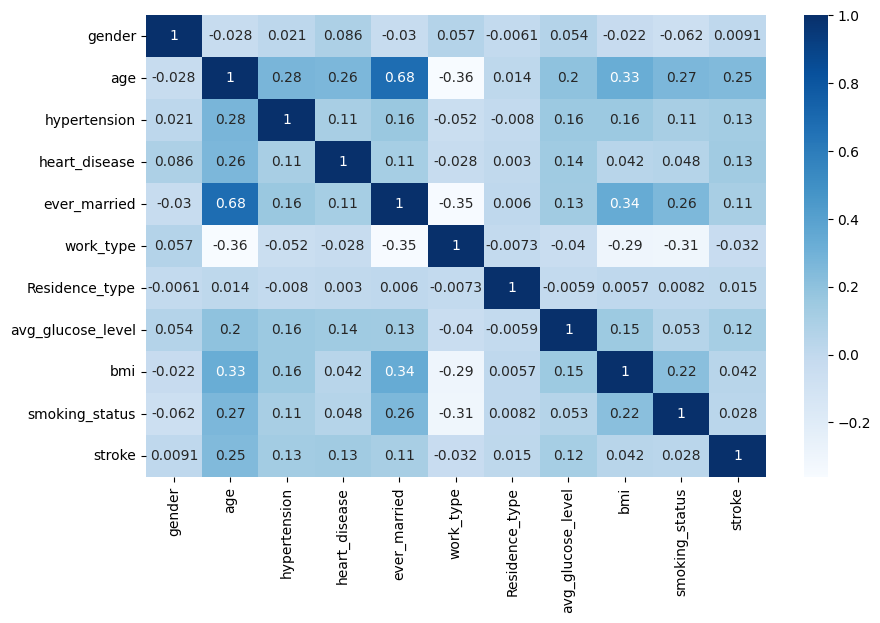

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.savefig('heatmap.png',dpi=300)

<Axes: xlabel='stroke', ylabel='gender'>

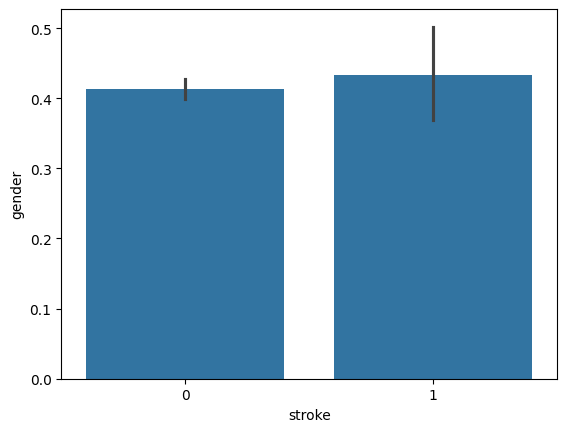

In [ ]:
sns.barplot(data=df,x='stroke',y='gender')

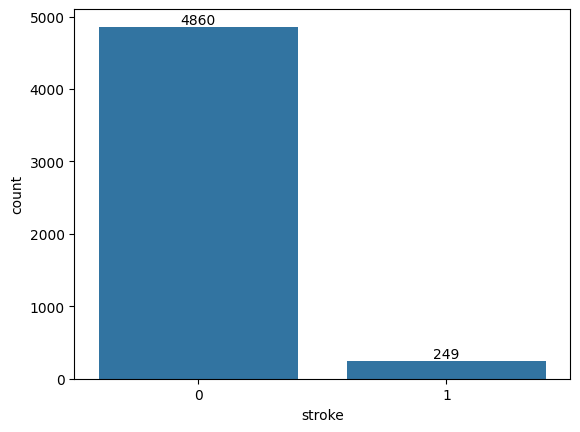

In [ ]:

#plt.savefig('gender_stroke.png',dpi=300)
import seaborn as sns
import matplotlib.pyplot as plt

# Your countplot
ax = sns.countplot(data=df, x='stroke')

# Add counts on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.savefig('stroke_count_before.png',dpi=300)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import oversample
# First, oversample your dataset
X_over, y_over = oversample.fit_resample(X, y)

# Plot the countplot of the resampled labels
ax = sns.countplot(x=y_over)

# Add counts on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title("Class Distribution After Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig('stroke_count_after.png',dpi=300)
plt.show()


ImportError: cannot import name 'oversample' from 'sklearn.preprocessing' (/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/__init__.py)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, auc, roc_auc_score, roc_curve, f1_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_over, y_over,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7776, 10)
(1944, 10)
(7776,)
(1944,)


In [ ]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,169.365,36.6,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,169.365,28.9,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.920,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,169.365,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,169.365,24.0,1,False,True,False,False,True,False,False,False,True,False


In [ ]:
num_cols = ['age','avg_glucose_level', 'bmi']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
7609,0,1.112005,0,0,1,3,1,-0.853393,0.790355,2
1739,0,-1.745930,0,0,0,3,1,-0.541620,-0.316569,0
2098,0,-0.540239,0,0,1,3,1,-0.879374,-1.423492,1
8948,0,0.576142,0,0,1,2,0,1.562848,1.581014,0
2373,0,0.308211,1,0,1,3,0,-0.905355,0.790355,2


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.99      1.00      0.99       968

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944

[[965  11]
 [  0 968]]
0.9943415637860082


In [ ]:
import joblib
joblib.dump(rf, 'stroke_rf.pkl')

['stroke_rf.pkl']

In [ ]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
X_train.to_csv('X_train.csv',index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)
import numpy as np

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Define model and RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rcv_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                n_iter=10, cv=cv, scoring='accuracy',
                                return_train_score=True, random_state=42)
rcv_random.fit(X_train, y_train)

# Predictions
y_pred_rcv = rcv_random.predict(X_test)

# Print evaluation metrics (excluding accuracy and AUC)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rcv))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rcv))

print(f"Precision Score: {precision_score(y_test, y_pred_rcv, average='weighted')*100:.2f}%")
print(f"Recall Score: {recall_score(y_test, y_pred_rcv, average='weighted')*100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_rcv, average='weighted')*100:.2f}%")
print("Best Parameters:", rcv_random.best_params_)

# Cross-validation fold results for best parameters
print("\nCross-Validation Fold Results (Best Estimator):")
cv_results = rcv_random.cv_results_
fold_keys = [key for key in cv_results if key.startswith("split") and key.endswith("_test_score")]

fold_scores = [cv_results[key][rcv_random.best_index_] for key in fold_keys]
for i, score in enumerate(fold_scores):
    print(f"Fold {i+1}: {score:.4f}")

mean_score = np.mean(fold_scores)
std_score = np.std(fold_scores, ddof=1)  # Sample standard deviation
print(f"\nMean CV Score: {mean_score:.4f}")
print(f"Standard Deviation: {std_score:.4f}")



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.99      1.00      0.99       968

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944

Confusion Matrix:
[[966  10]
 [  0 968]]
Precision Score: 99.49%
Recall Score: 99.49%
F1 Score: 99.49%
Best Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'criterion': 'entropy'}

Cross-Validation Fold Results (Best Estimator):
Fold 1: 0.9865
Fold 2: 0.9871
Fold 3: 0.9846
Fold 4: 0.9865
Fold 5: 0.9859

Mean CV Score: 0.9861
Standard Deviation: 0.0010


In [ ]:
# Predictions on training set
y_train_pred = rcv_random.predict(X_train)

# Training Metrics
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print(f"Training Precision: {precision_score(y_train, y_train_pred, average='weighted')*100:.2f}%")
print(f"Training Recall: {recall_score(y_train, y_train_pred, average='weighted')*100:.2f}%")
print(f"Training F1 Score: {f1_score(y_train, y_train_pred, average='weighted')*100:.2f}%")



Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3884
           1       1.00      1.00      1.00      3892

    accuracy                           1.00      7776
   macro avg       1.00      1.00      1.00      7776
weighted avg       1.00      1.00      1.00      7776

Training Confusion Matrix:
[[3884    0]
 [   0 3892]]
Training Precision: 100.00%
Training Recall: 100.00%
Training F1 Score: 100.00%


## Lime

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

ModuleNotFoundError: No module named 'lime'

In [ ]:
y_test.value_counts()

,count
stroke,
0,976
1,968


In [ ]:
import lime
import lime.lime_tabular
import warnings

# Suppress future warnings from LIME and pandas
warnings.filterwarnings("ignore", category=FutureWarning)

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[5],
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## SHAP

In [ ]:
model = rf

In [ ]:
!pip install shap

In [ ]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

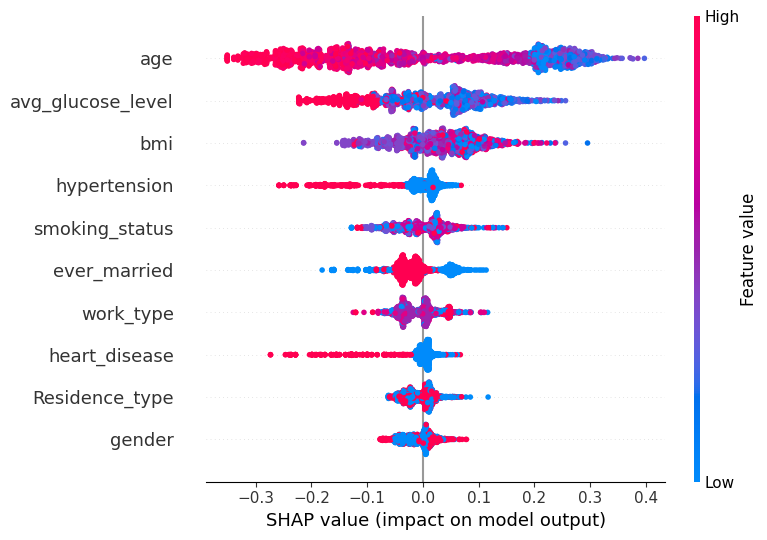

In [ ]:
plt.figure()
shap.summary_plot(shap_values[:, :, class_idx], X_test, show=False)  # prevent auto show
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')   # now works!
plt.show()

In [ ]:
X_test.shape

(1944, 10)

In [ ]:
X_instance.shape

(1, 10)

In [ ]:
shap_values.shape

(1944, 10, 2)

In [ ]:
shap_values

array([[[ 0.00701863, -0.00701863],
        [ 0.2453766 , -0.2453766 ],
        [ 0.01497111, -0.01497111],
        ...,
        [ 0.05555506, -0.05555506],
        [ 0.08643302, -0.08643302],
        [ 0.02443299, -0.02443299]],

       [[ 0.00900278, -0.00900278],
        [ 0.26207265, -0.26207265],
        [ 0.0087822 , -0.0087822 ],
        ...,
        [ 0.10114218, -0.10114218],
        [ 0.0657139 , -0.0657139 ],
        [ 0.04596668, -0.04596668]],

       [[-0.00272701,  0.00272701],
        [ 0.13196788, -0.13196788],
        [ 0.01792895, -0.01792895],
        ...,
        [ 0.14741403, -0.14741403],
        [ 0.03225205, -0.03225205],
        [ 0.03570525, -0.03570525]],

       ...,

       [[ 0.00457363, -0.00457363],
        [ 0.29780407, -0.29780407],
        [ 0.01926143, -0.01926143],
        ...,
        [ 0.08396234, -0.08396234],
        [ 0.06624487, -0.06624487],
        [ 0.02029191, -0.02029191]],

       [[ 0.00337059, -0.00337059],
        [ 0.06379292, -0.06

In [ ]:
rf.predict_proba(X_test.iloc[[9]])


array([[0.69, 0.31]])

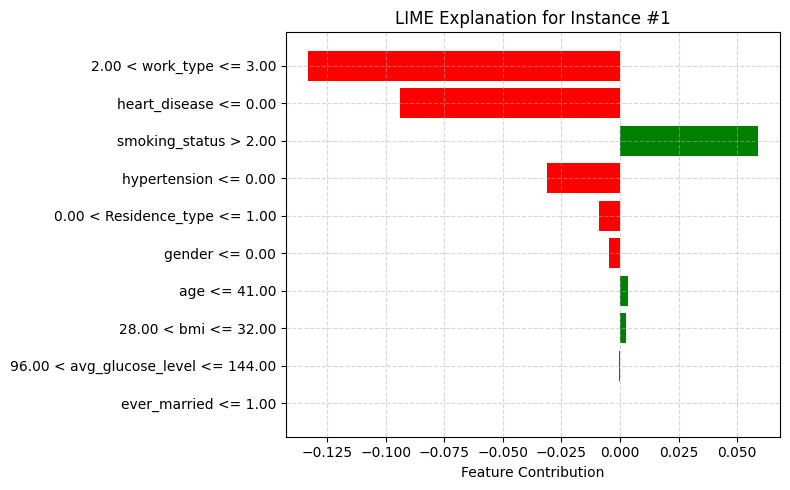

In [ ]:
import matplotlib.pyplot as plt

# Get feature weights
feature_names, weights = zip(*exp.as_list())

# Plot
plt.figure(figsize=(8, 5))
colors = ['green' if w > 0 else 'red' for w in weights]
plt.barh(feature_names, weights, color=colors)
plt.xlabel('Feature Contribution')
plt.title('LIME Explanation for Instance #1')
plt.gca().invert_yaxis()  # Highest impact feature on top
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## SHAP

DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
shap.summary_plot(shap_values[1], X_test)


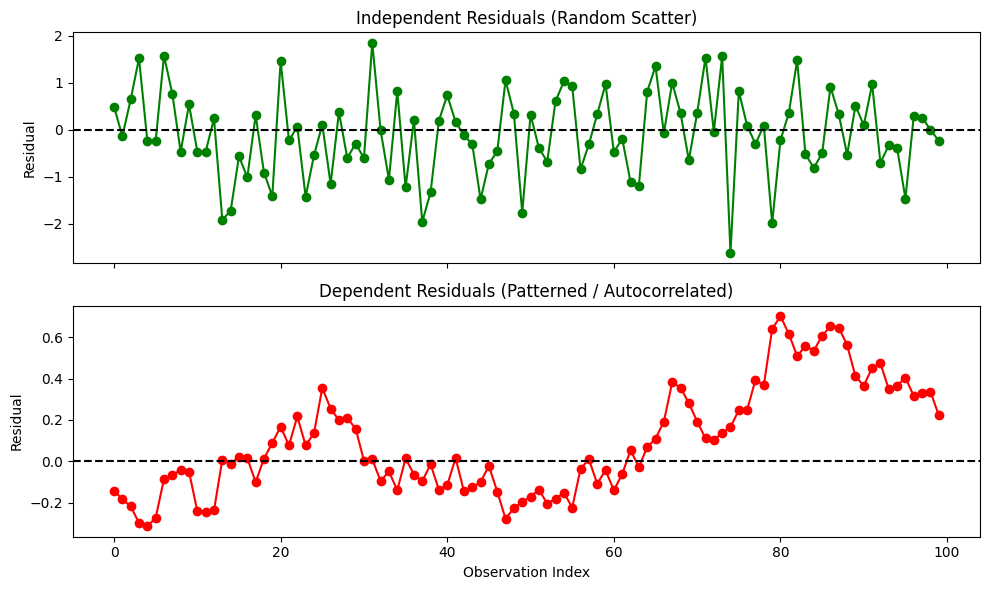

## Random Forest

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.99      1.00      0.99       968

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944

[[963  13]
 [  0 968]]
Accuracy Score: 99.33
Precision Score: 99.34
Recall Score: 99.33
F1 Score: 99.33
Best Parameters: {'n_estimators': 100, 'max_features': 'log2', 'criterion': 'gini'}
AUC Score: 1.0000


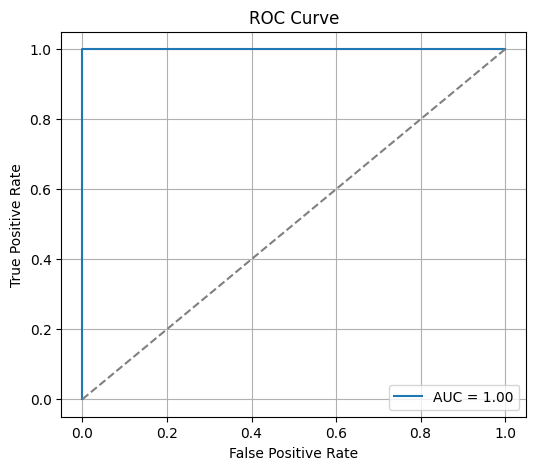

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Model and search
rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rcv_random = RandomizedSearchCV(rf, param_grid, cv=cv, n_iter=10, random_state=42)
rcv_random.fit(X_train, y_train)

# Predictions
y_pred_rcv = rcv_random.predict(X_test)
y_pred_proba = rcv_random.predict_proba(X_test)[:, 1]  # for AUC

# Evaluation
print(classification_report(y_test, y_pred_rcv))
print(confusion_matrix(y_test, y_pred_rcv))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rcv)*100:.2f}")
print(f"Precision Score: {precision_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print(f"Recall Score: {recall_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print("Best Parameters:", rcv_random.best_params_)

# AUC and ROC Curve (Only if it's binary classification)
if len(set(y_test)) == 2:
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("ROC Curve and AUC can only be plotted for binary classification.")


In [ ]:
rf = {'TP':967,'FP':8,'FN':0,'TN':970,'accuracy':99.58,'precision':99.17,'recall':1.00,'F1':99.58}


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       975
           1       0.99      1.00      0.99       970

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

[[961  14]
 [  0 970]]
0.9928020565552699


In [ ]:
import joblib

joblib.dump(rf, 'stroke_rf.pkl')

['stroke_rf.pkl']

In [ ]:
print(f"Accuracy score for rf: {accuracy_score(y_test,rf_pred)*100:.2f}")
print(f"precision score for rf: {precision_score(y_test,rf_pred,average='weighted')*100:.2f}")
print(f"recall_score for rf: {recall_score(y_test,rf_pred,average='weighted')*100:.2f}")
print(f"f1_score for rf: {f1_score(y_test,rf_pred,average='weighted')*100:.2f}")

Accuracy score for rf: 99.33
precision score for rf: 99.34
recall_score for rf: 99.33
f1_score for rf: 99.33


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}
dt_random = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dt_random.fit(X_train, y_train)

dt_pred = dt_random.predict(X_test)

print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
print(accuracy_score(y_test,dt_pred))
print(precision_score(y_test,dt_pred,average='weighted'))
print(recall_score(y_test,dt_pred,average='weighted'))
print(f1_score(y_test,dt_pred,average='weighted'))
print(dt_random.best_params_)

[[920  56]
 [  0 968]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       976
           1       0.95      1.00      0.97       968

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

0.9711934156378601
0.9727687757201646
0.9711934156378601
0.9711729137731319
{'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}


In [ ]:
dt = {'TP':920,'TN':968,'FP':56,'FN':0,'accuracy':97.11,'precision':94.26,'recall':1.00,'F1':97.05}

Confusion Matrix:
 [[923  53]
 [  0 968]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       976
           1       0.95      1.00      0.97       968

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

Accuracy: 0.9727366255144033
Precision: 0.9741518643466626
Recall: 0.9727366255144033
F1 Score: 0.9727194104661433
Best Params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
AUC Score: 0.9777


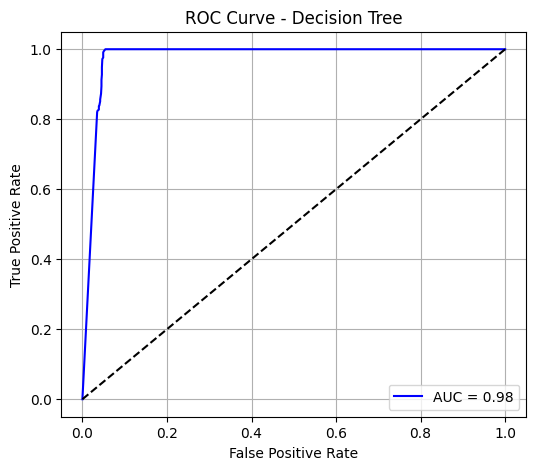

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Define model and parameter grid
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

# Randomized Search CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_random = RandomizedSearchCV(dt, param_grid, cv=cv, random_state=42)
dt_random.fit(X_train, y_train)

# Predictions
dt_pred = dt_random.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred, average='weighted'))
print("Recall:", recall_score(y_test, dt_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, dt_pred, average='weighted'))
print("Best Params:", dt_random.best_params_)

# ✅ AUC and ROC Curve (only for binary classification)
if len(set(y_test)) == 2:
    y_proba = dt_random.predict_proba(X_test)[:, 1]  # probability for class 1
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Decision Tree")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("AUC & ROC curve only applicable for binary classification.")


## svm

In [ ]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],

}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm = RandomizedSearchCV(SVC(),param_grid,cv=cv)
svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)

print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))
print(accuracy_score(y_test,svm_pred))
print(precision_score(y_test,svm_pred,average='weighted'))
print(recall_score(y_test,svm_pred,average='weighted'))
print(f1_score(y_test,svm_pred,average='weighted'))
print(svm.best_params_)

[[817 159]
 [ 37 931]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       976
           1       0.85      0.96      0.90       968

    accuracy                           0.90      1944
   macro avg       0.91      0.90      0.90      1944
weighted avg       0.91      0.90      0.90      1944

0.8991769547325102
0.9056124567847299
0.8991769547325102
0.8988046247305507
{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [ ]:
svm = {'TP':817,'TN':931,'FP':159,'FN':37,'accuracy':89.92,'precision':83.71,'Recall':95.66,'F1':89.59}

Confusion Matrix:
 [[707 269]
 [ 96 872]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       976
           1       0.76      0.90      0.83       968

    accuracy                           0.81      1944
   macro avg       0.82      0.81      0.81      1944
weighted avg       0.82      0.81      0.81      1944

Accuracy: 0.8122427983539094
Precision: 0.8225842138122349
Recall: 0.8122427983539094
F1 Score: 0.8108143184883191
AUC Score: 0.8842


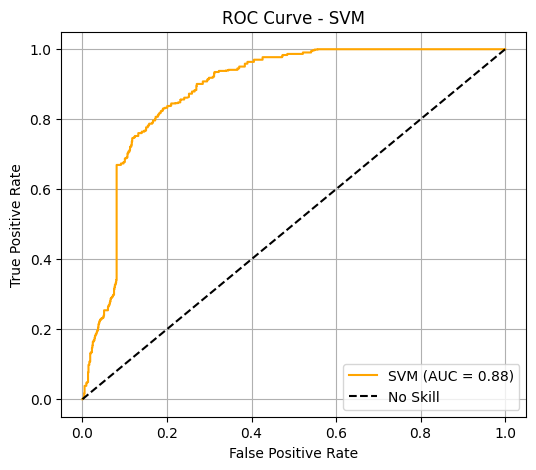

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Define param grid

# Enable probability for ROC/AUC
svm_model = SVC(probability=True)

# Random search CV
svm = svm_model
svm.fit(X_train, y_train)

# Predict
svm_pred = svm.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred, average='weighted'))
print("Recall:", recall_score(y_test, svm_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, svm_pred, average='weighted'))


# ✅ AUC and ROC (for binary classification)
if len(set(y_test)) == 2:
    y_prob = svm.predict_proba(X_test)[:, 1]  # Probability of class 1
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc:.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.2f})", color='orange')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - SVM")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("AUC and ROC Curve require binary classification.")


In [ ]:
import joblib

joblib.dump(svm, 'stroke_svm.pkl')

['stroke_svm.pkl']

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))
print(precision_score(y_test,knn_pred,average='weighted'))
print(recall_score(y_test,knn_pred,average='weighted'))
print(f1_score(y_test,knn_pred,average='weighted'))

[[928  48]
 [  0 968]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       976
           1       0.95      1.00      0.98       968

    accuracy                           0.98      1944
   macro avg       0.98      0.98      0.98      1944
weighted avg       0.98      0.98      0.98      1944

0.9753086419753086
0.9764751628268689
0.9753086419753086
0.9752960921525121


In [ ]:
knn = {'TP':934,'TN':968,'FP':42,'FN':0,'accuracy':97.84,'precision':95.69,'recall':1.00,'F1':97.79}

Confusion Matrix:
 [[928  48]
 [  0 968]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       976
           1       0.95      1.00      0.98       968

    accuracy                           0.98      1944
   macro avg       0.98      0.98      0.98      1944
weighted avg       0.98      0.98      0.98      1944

Accuracy: 0.9753086419753086
Precision: 0.9764751628268689
Recall: 0.9753086419753086
F1 Score: 0.9752960921525121
AUC Score: 0.9754


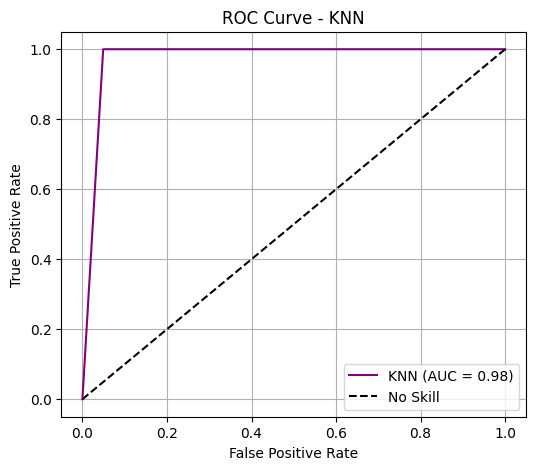

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Initialize and fit the model
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)

# Predictions
knn_pred = knn.predict(X_test)

# Basic metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred, average='weighted'))
print("Recall:", recall_score(y_test, knn_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, knn_pred, average='weighted'))

# ✅ AUC and ROC (Binary)
if len(set(y_test)) == 2:
    y_prob = knn.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})', color='purple')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("ROC Curve and AUC require binary classification.")


In [ ]:
import joblib

joblib.dump(knn, 'stroke_knn.pkl')

['stroke_knn.pkl']

## GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gb = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, cv=cv)
gb.fit(X_train, y_train)


gb_pred = gb.predict(X_test)

print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
print(precision_score(y_test,gb_pred,average='weighted'))
print(recall_score(y_test,gb_pred,average='weighted'))
print(f1_score(y_test,gb_pred,average='weighted'))
print(gb.best_params_)

[[918  58]
 [  0 968]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       976
           1       0.94      1.00      0.97       968

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

0.9718512101011559
0.970164609053498
0.9701416990791861
{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2}


In [ ]:
gb = {'TP':918,'TN':968,'FP':58,'FN':0,'accuracy':97.07,'precision':94.06,'recall':1.00,'F1':96.94}

In [ ]:
print(accuracy_score(y_test,gb_pred))

0.970164609053498


Confusion Matrix:
 [[774 202]
 [ 53 915]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       976
           1       0.82      0.95      0.88       968

    accuracy                           0.87      1944
   macro avg       0.88      0.87      0.87      1944
weighted avg       0.88      0.87      0.87      1944

Accuracy: 0.8688271604938271
Precision: 0.8777759347980224
Recall: 0.8688271604938271
F1 Score: 0.8680940870031528
AUC Score: 0.9754


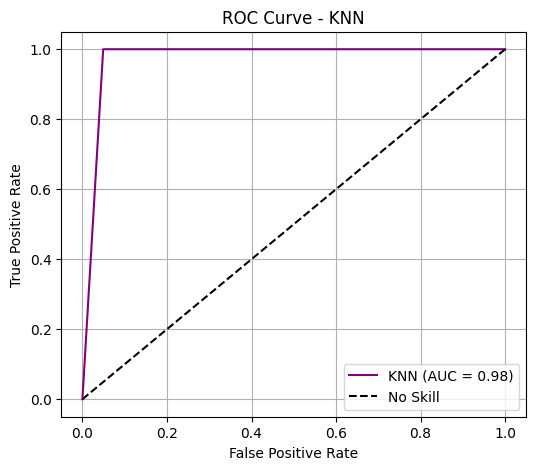

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


gb_pred = gb.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Precision:", precision_score(y_test, gb_pred, average='weighted'))
print("Recall:", recall_score(y_test, gb_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, gb_pred, average='weighted'))

# ✅ AUC and ROC (Binary)
if len(set(y_test)) == 2:
    y_prob = knn.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})', color='purple')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("ROC Curve and AUC require binary classification.")


## Xg Boost

Confusion Matrix:
 [[916  60]
 [  0 968]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       976
           1       0.94      1.00      0.97       968

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

Accuracy: 0.9691358024691358
Precision: 0.9709372147763847
Recall: 0.9691358024691358
F1 Score: 0.9691103031893139
AUC Score: 0.9754


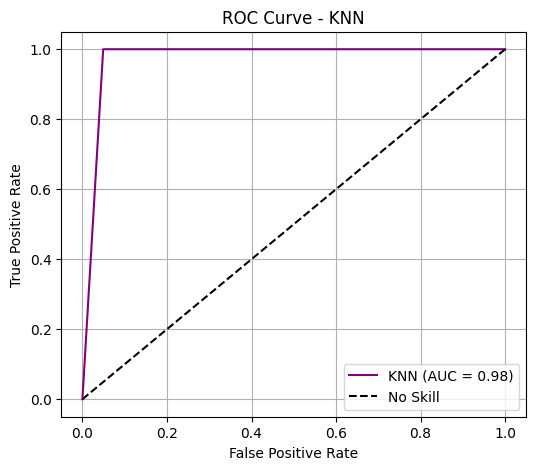

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV




# Grid search
grid_search = xgb.XGBClassifier()

grid_search.fit(X_train, y_train)
xg_pred = grid_search.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, xg_pred))
print("\nClassification Report:\n", classification_report(y_test, xg_pred))
print("Accuracy:", accuracy_score(y_test, xg_pred))
print("Precision:", precision_score(y_test, xg_pred, average='weighted'))
print("Recall:", recall_score(y_test, xg_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, xg_pred, average='weighted'))

# ✅ AUC and ROC (Binary)
if len(set(y_test)) == 2:
    y_prob = knn.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})', color='purple')
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("ROC Curve and AUC require binary classification.")

In [ ]:
xg = {'TP':907,'TN':968,'FP':69,'FN':0,'accuracy':96.45,'precision':92.93,'recall':1.00,'F1':96.34}

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



# Grid search
grid_search = xgb.XGBClassifier()

grid_search.fit(X_train, y_train)
xg_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test,xg_pred))
print(classification_report(y_test,xg_pred))
print(accuracy_score(y_test,xg_pred))
print(precision_score(y_test,xg_pred,average='weighted')) # Use xgb_pred
print(recall_score(y_test,xg_pred,average='weighted'))    # Use xgb_pred
print(f1_score(y_test,xg_pred,average='weighted'))       # Use xgb_pred


## Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier()

# Create voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('dt', model1),
        ('knn', model2),
        ('rf', model3)
    ],
    voting='hard'  # Use 'hard' for majority vote, 'soft' for average probability
)

# Train and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
print(precision_score(y_test,knn_pred,average='weighted'))
print(recall_score(y_test,dt_pred,average='weighted'))
print(f1_score(y_test,dt_pred,average='weighted'))

Voting Classifier Accuracy: 0.98
[[922  54]
 [  0 968]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       976
           1       0.95      1.00      0.97       968

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944

0.979293484904046
0.9711934156378601
0.9711729137731319


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC

# Create individual models
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier()

# Create voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('dt', model1),
        ('knn', model2),
        ('rf', model3),

    ],
    voting='soft'
)

# Train and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,dt_pred))
print(f"Voting Classifier Accuracy: {accuracy:.2f}")
print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,dt_pred))
print(precision_score(y_test,dt_pred,average='weighted'))
print(recall_score(y_test,dt_pred,average='weighted'))
print(f1_score(y_test,dt_pred,average='weighted'))

[[920  56]
 [  0 968]]
Voting Classifier Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       976
           1       0.97      1.00      0.98       968

    accuracy                           0.98      1944
   macro avg       0.98      0.98      0.98      1944
weighted avg       0.99      0.98      0.98      1944

0.9711934156378601
0.9727687757201646
0.9711934156378601
0.9711729137731319


##PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


pca = PCA(0.8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)


rf_2 = RandomForestClassifier()
rf_2.fit(X_train_pca, y_train)

# Predict on PCA-transformed test data
rf_pred_2 = rf_2.predict(X_test_pca)

# Evaluate
print(classification_report(y_test, rf_pred_2))
print(confusion_matrix(y_test, rf_pred_2))
print(accuracy_score(y_test, rf_pred_2))


(4088, 7)
(1022, 7)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022

[[960   0]
 [ 61   1]]
0.9403131115459883


## TEST

In [ ]:
import joblib
model = joblib.load('/content/stroke_rf.pkl')


In [ ]:
model

RandomForestClassifier()

In [ ]:
df.sample(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1652,1,70,0,0,1,2,1,66,29,0,0
708,0,59,0,0,1,2,1,169,43,1,0
2854,0,8,0,0,0,4,0,92,19,0,0


In [ ]:
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


In [ ]:
li = [1,9,0,0,0,4,1,150,17.4,0]

li = np.array(li).reshape(1,-1)


In [ ]:
li.shape

(1, 10)

In [ ]:
ans = model.predict(li)
ans

array([0])